<a href="https://colab.research.google.com/github/francuzovd/probability_theory/blob/master/ProjectGB_Statistic_FrantsuzovDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование влияния выделенного бюджета на рейтинг фильма c 1995 - 2016 гг.


## 1. Цель исследования.

Целью исслдеования является понять взаимосвязь между выделяемым бюджетом на производство фильма и итоговым рейтингом на IMDb.

## 2. Получение выборки.
Используется готовый датасет с [Kaggle](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset).

Для получения выборки выделяем Топ-3 страны (США, Великобритания, Франция) по количеству фильмов с выставленным рейтингом IMDb. 

В связи с тем, что начиная с 1920 г. не каждая страна снимала свои фильмы, высчитаваем промежуток времени, для которого в странах производились фильмы и они есть в итоговой выборке. В данном случае это промежуток с 1995 - 2016 гг.

В конце удаляем все наблюдения с хотя бы одним пустым значением.

In [0]:
import os
from google.colab import files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
files.upload()

Saving movie_metadata.csv to movie_metadata.csv


{'movie_metadata.csv': b'color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes\r\nColor,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar\xc2\xa0,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000\r\nColor,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World\'s End\xc2\xa0,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://

In [3]:
os.listdir('/content/')

['.config', 'movie_metadata.csv', 'sample_data']

In [4]:
data = pd.read_csv('/content/movie_metadata.csv')
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
top_country = data[['country', 'imdb_score']].groupby(by=['country'], axis=0).count().reset_index().nlargest(3, 'imdb_score')
top_country = top_country['country'].unique()
top_country

array(['USA', 'UK', 'France'], dtype=object)

Для лучше наглядности цифр переведём бюджет в миллионы, раздеив каждое значение на 1 000 000.

In [8]:
sample = data[['country', 'imdb_score', 'title_year', 'budget']].loc[(data['country'].isin(top_country)) & (data['title_year'] >= 1995)].dropna()
sample['budget'] /= 1000000 
sample.head()

,country,imdb_score,title_year,budget
0,USA,7.9,2009.0,237.0
1,USA,7.1,2007.0,300.0
2,UK,6.8,2015.0,245.0
3,USA,8.5,2012.0,250.0
5,USA,6.6,2012.0,263.7


In [9]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3341 entries, 0 to 5042
Data columns (total 4 columns):
country       3341 non-null object
imdb_score    3341 non-null float64
title_year    3341 non-null float64
budget        3341 non-null float64
dtypes: float64(3), object(1)
memory usage: 130.5+ KB


## 3. Исследование выборки.


In [0]:
sample_usa = sample.loc[sample['country'] == 'USA']
sample_uk = sample.loc[sample['country'] == 'UK']
sample_fr = sample.loc[sample['country'] == 'France']

Рассмотрим распределние рейтинга IMDb по каждой стране за весь период времени:

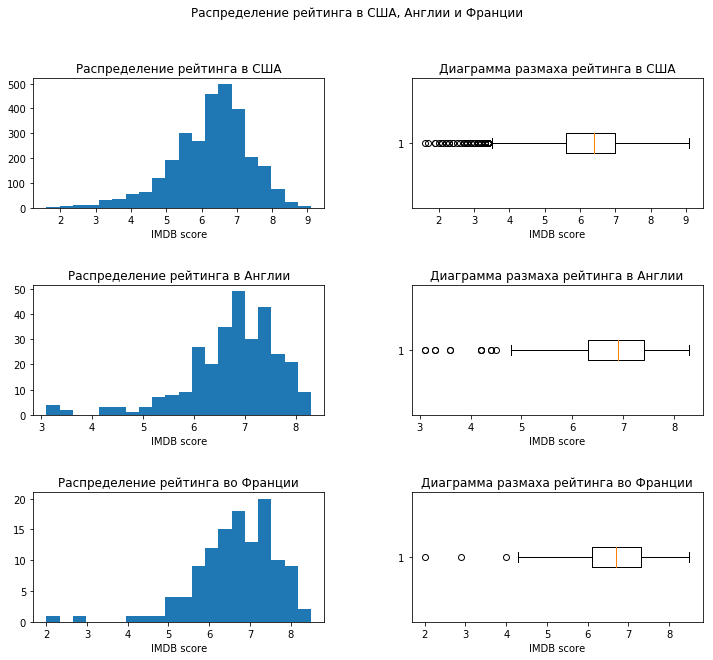

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=2)
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

ax1.hist(sample_usa['imdb_score'], bins=20)
ax1.set_title('Распределение рейтинга в США')
ax1.set_xlabel('IMDB score')

ax2.boxplot(sample_usa['imdb_score'], vert=False)
ax2.set_title('Диаграмма размаха рейтинга в США')
ax2.set_xlabel('IMDB score')

ax3.hist(sample_uk['imdb_score'], bins=20)
ax3.set_title('Распределение рейтинга в Англии')
ax3.set_xlabel('IMDB score')

ax4.boxplot(sample_uk['imdb_score'], vert=False)
ax4.set_title('Диаграмма размаха рейтинга в Англии')
ax4.set_xlabel('IMDB score')

ax5.hist(sample_fr['imdb_score'], bins=20)
ax5.set_title('Распределение рейтинга во Франции')
ax5.set_xlabel('IMDB score')

ax6.boxplot(sample_fr['imdb_score'], vert=False)
ax6.set_title('Диаграмма размаха рейтинга во Франции')
ax6.set_xlabel('IMDB score')

fig.suptitle("Распределение рейтинга в США, Англии и Франции")
fig.set_size_inches(12, 10)
fig.subplots_adjust(wspace=0.3, hspace=0.6)



In [12]:
sample.groupby(by=['country']).imdb_score.agg(['std', 'min', 'max', 'mean', 'median']).reset_index()

,country,std,min,max,mean,median
0,France,1.027654,2.0,8.5,6.628926,6.7
1,UK,0.926301,3.1,8.3,6.769128,6.9
2,USA,1.092511,1.6,9.1,6.247536,6.4


*Вывод: распределения рейтингов фильмов Франции и Англии примерно одинаковы, когда распределение фильмов в США смещенно влево.
При большом колличестве снятых фильмов в США, средний рейтинг, медиана и стандартное отклонение во Франции и Англии выше. При этом самый высокий рейтинг в США (фильм - Kickboxer: Vengeance)*

Рассмотрим распределние бюджета на производство фильмов по каждой стране за весь период времени:

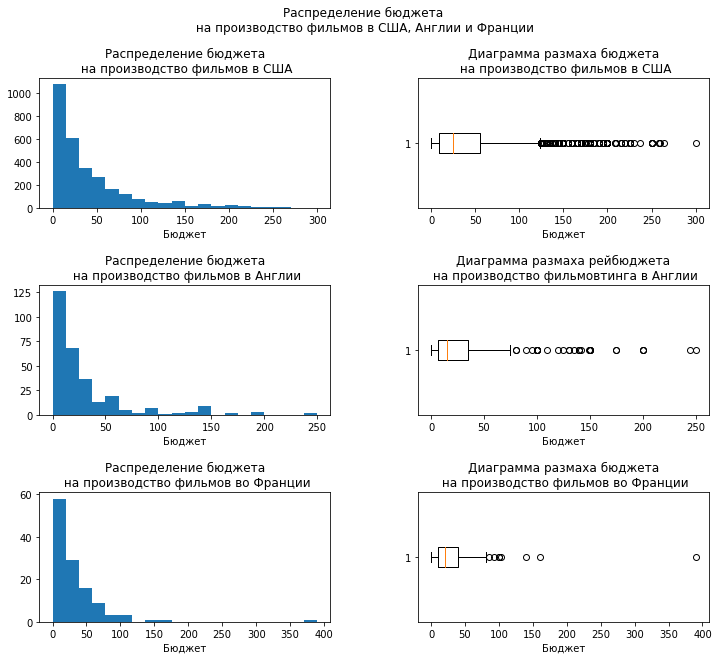

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=2)
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

ax1.hist(sample_usa['budget'], bins=20)
ax1.set_title('Распределение бюджета\n на производство фильмов в США')
ax1.set_xlabel('Бюджет')

ax2.boxplot(sample_usa['budget'], vert=False)
ax2.set_title('Диаграмма размаха бюджета\n на производство фильмов в США')
ax2.set_xlabel('Бюджет')
ax3.hist(sample_uk['budget'], bins=20)
ax3.set_title('Распределение бюджета\n на производство фильмов в Англии')
ax3.set_xlabel('Бюджет')

ax4.boxplot(sample_uk['budget'], vert=False)
ax4.set_title('Диаграмма размаха рейбюджета\n на производство фильмовтинга в Англии')
ax4.set_xlabel('Бюджет')

ax5.hist(sample_fr['budget'], bins=20)
ax5.set_title('Распределение бюджета\n на производство фильмов во Франции')
ax5.set_xlabel('Бюджет')

ax6.boxplot(sample_fr['budget'], vert=False)
ax6.set_title('Диаграмма размаха бюджета\n на производство фильмов во Франции')
ax6.set_xlabel('Бюджет')

fig.suptitle("Распределение бюджета\n на производство фильмов в США, Англии и Франции")
fig.set_size_inches(12, 10)
fig.subplots_adjust(wspace=0.3, hspace=0.6)


In [14]:
sample.groupby(by=['country']).budget.agg(['std', 'min', 'max', 'mean', 'median']).reset_index()

,country,std,min,max,mean,median
0,France,43.614412,0.004500,390.0,31.910285,20.0
1,UK,42.942562,0.014000,250.0,31.621240,15.0
2,USA,45.014547,0.000218,300.0,39.944416,25.0


*Вывод: Бюджет на производство фильмов больше рапределён в США, при этом в среднем в США тратят на производство фильмов больше.

*Среднее квадратичное отклонение во трёх странах примерно одинаковое, но в США оно самое большое. При этом самое минимальное значение бюджета - в США (фильм - Tarnation).*


*Фо Франции наблюдается самый максимальный бюджет на создание фильма (фильм - The Messenger: The Story of Joan of Arc)*

Рассмотрим изменение среднего рейтинга и бюджета по годам в каждой стране:

In [0]:
sample_usa_Y = sample_usa.groupby(by=['title_year']).mean().reset_index()
sample_uk_Y = sample_uk.groupby(by=['title_year']).mean().reset_index()
sample_fr_Y = sample_fr.groupby(by=['title_year']).mean().reset_index()


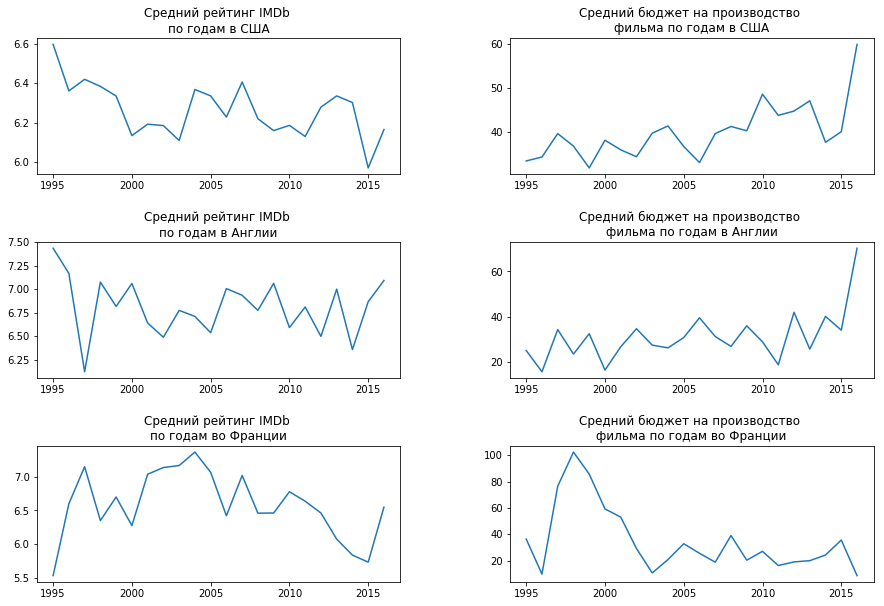

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=2)
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

ax1.plot(sample_usa_Y['title_year'], sample_usa_Y['imdb_score'])
ax1.set_title('Средний рейтинг IMDb \nпо годам в США')

ax2.plot(sample_usa_Y['title_year'], sample_usa_Y['budget'])
ax2.set_title('Средний бюджет на производство \nфильма по годам в США')

ax3.plot(sample_uk_Y['title_year'], sample_uk_Y['imdb_score'])
ax3.set_title('Средний рейтинг IMDb \nпо годам в Англии')

ax4.plot(sample_uk_Y['title_year'], sample_uk_Y['budget'])
ax4.set_title('Средний бюджет на производство \nфильма по годам в Англии')

ax5.plot(sample_fr_Y['title_year'], sample_fr_Y['imdb_score'])
ax5.set_title('Средний рейтинг IMDb \nпо годам во Франции')

ax6.plot(sample_fr_Y['title_year'], sample_fr_Y['budget'])
ax6.set_title('Средний бюджет на производство \nфильма по годам во Франции')

fig.set_size_inches(15, 10)
plt.subplots_adjust(wspace=0.3, hspace=0.5)


На графиках видно, что бюджет и рейтинг имеет скачкообразную форму и тяжело провести взаимосвязь между этими двумя величинами.


### 4. Статистические рассчёты

Для более детального рассмотрения бюджета на производство фильмов и итогового рейтинга рассчитаем корреляцию и ковариацию.
Так же вычислим доверитильный интервал математиеског оожидания бюджета для каждой страны.

In [17]:
corr_cov_matrix = pd.DataFrame({'country' : ['USA', 'UK', 'France', 'All'], 
                            'correlation' : [sample_usa.loc[:, ['imdb_score', 'budget']].corr().loc['imdb_score', 'budget'], 
                                             sample_uk.loc[:, ['imdb_score', 'budget']].corr().loc['imdb_score', 'budget'],
                                             sample_fr.loc[:, ['imdb_score', 'budget']].corr().loc['imdb_score', 'budget'],
                                             sample.loc[:, ['imdb_score', 'budget']].corr().loc['imdb_score', 'budget']],
                           'covariation': [np.cov(sample_usa['imdb_score'], sample_usa['budget'])[0, 1], 
                                           np.cov(sample_uk['imdb_score'], sample_uk['budget'])[0, 1],
                                           np.cov(sample_fr['imdb_score'], sample_fr['budget'])[0, 1],
                                           np.cov(sample['imdb_score'], sample['budget'])[0, 1]]
                           })
corr_cov_matrix

,country,correlation,covariation
0,USA,0.149846,7.369251
1,UK,0.032260,1.283241
2,France,0.016354,0.732986
3,All,0.125993,6.149252


Исходя из таблицы выше мы видим, что корреляция в кадой стране, а так же в целом близка к 0. Это значит, что бюджет не так сильно влияет на рейтинг, а так же, что их связь нелинейна.

Рассчитаем доверительный интервал для математического ожидания бюджета в каждой стране и в совокупности с надёжностью $\alpha = 0.95$. 

Для этого используем таблицу Лапласа, $t_{kr} = 1.96$, а так же будем считать, что генеральная совокупность нормально распределенна.

In [49]:
t_kr = 1.96
conf_int = pd.DataFrame({'country' : ['USA', 'UK', 'France', 'All'], 
                         'confidence_interval' : [(sample_usa['budget'].mean() - t_kr * sample_usa['budget'].std() / sample_usa['budget'].shape[0] ** 0.5, sample_usa['budget'].mean() + t_kr * sample_usa['budget'].std() / sample_usa['budget'].shape[0] ** 0.5), 
                                                  (sample_uk['budget'].mean() - t_kr * sample_uk['budget'].std() / sample_uk['budget'].shape[0] ** 0.5, sample_uk['budget'].mean() + t_kr * sample_uk['budget'].std() / sample_uk['budget'].shape[0] ** 0.5),
                                                  (sample_fr['budget'].mean() - t_kr * sample_fr['budget'].std() / sample_fr['budget'].shape[0] ** 0.5, sample_fr['budget'].mean() + t_kr * sample_fr['budget'].std() / sample_fr['budget'].shape[0] ** 0.5),
                                                  (sample['budget'].mean() - t_kr * sample['budget'].std() / sample['budget'].shape[0] ** 0.5, sample['budget'].mean() + t_kr * sample['budget'].std() / sample['budget'].shape[0] ** 0.5)]
                        })
for i,j in enumerate(conf_int['confidence_interval']):
    conf_int['confidence_interval'][i] = tuple(map(lambda x: round(x, 3), j))
    

conf_int

,country,confidence_interval
0,USA,"(38.312, 41.577)"
1,UK,"(26.746, 36.497)"
2,France,"(24.139, 39.682)"
3,All,"(37.39, 40.432)"


Так же рассчитаем доверительный интервал для математического ожидания бюджета в каждой стране для рейтинга IMDb выше 6.0 с надежностью $\alpha = 0.95$

In [50]:
t_kr = 1.96
spl_S = sample.loc[sample['imdb_score'] >= 6]
spl_usa_S = sample_usa.loc[sample['imdb_score'] >= 6]
spl_uk_S = sample_uk.loc[sample['imdb_score'] >= 6]
spl_fr_S = sample_fr.loc[sample['imdb_score'] >= 6]

conf_int_SC = pd.DataFrame({'country' : ['USA', 'UK', 'France', 'All'], 
                         'confidence_interval' : [(spl_usa_S['budget'].mean() - t_kr * spl_usa_S['budget'].std() / spl_usa_S['budget'].shape[0] ** 0.5, spl_usa_S['budget'].mean() + t_kr * spl_usa_S['budget'].std() / spl_usa_S['budget'].shape[0] ** 0.5), 
                                                  (spl_uk_S['budget'].mean() - t_kr * spl_uk_S['budget'].std() / spl_uk_S['budget'].shape[0] ** 0.5, spl_uk_S['budget'].mean() + t_kr * spl_uk_S['budget'].std() / spl_uk_S['budget'].shape[0] ** 0.5),
                                                  (spl_fr_S['budget'].mean() - t_kr * spl_fr_S['budget'].std() / spl_fr_S['budget'].shape[0] ** 0.5, spl_fr_S['budget'].mean() + t_kr * spl_fr_S['budget'].std() / spl_fr_S['budget'].shape[0] ** 0.5),
                                                  (spl_S['budget'].mean() - t_kr * spl_S['budget'].std() / spl_S['budget'].shape[0] ** 0.5, spl_S['budget'].mean() + t_kr * spl_S['budget'].std() / spl_S['budget'].shape[0] ** 0.5)]
                        })
for i,j in enumerate(conf_int_SC['confidence_interval']):
    conf_int_SC['confidence_interval'][i] = tuple(map(lambda x: round(x, 3), j))
    

conf_int_SC

,country,confidence_interval
0,USA,"(41.396, 45.775)"
1,UK,"(26.622, 37.621)"
2,France,"(24.394, 42.867)"
3,All,"(39.85, 43.842)"


Так же проведём дисперсионный анализ, чтобы выяснить: влияет ли фактор страны на выеление бюджета.

In [57]:
s2 = np.sum((sample['budget'] - sample['budget'].mean()) ** 2)
s2

6719689.428950345

In [58]:
s2f = (sample_usa['budget'].mean() - sample['budget'].mean()) ** 2 * sample_usa.shape[0] + (sample_uk['budget'].mean() - sample['budget'].mean()) ** 2 * sample_uk.shape[0] + (sample_fr['budget'].mean() - sample['budget'].mean()) ** 2 * sample_fr.shape[0]
s2f

24886.657896496785

In [59]:
s2_residual = np.sum((sample_usa['budget'] - sample_usa['budget'].mean()) ** 2) + np.sum((sample_uk['budget'] - sample_uk['budget'].mean()) ** 2) + np.sum((sample_fr['budget'] - sample_fr['budget'].mean()) ** 2)
s2_residual

6694802.771053847

In [61]:
s2, s2f + s2_residual

(6719689.428950345, 6719689.428950343)

In [62]:
sigma2_general = s2 / (sample['budget'].shape[0] - 1)
sigma2_factor = s2 / (3 - 1)
sigma2_residual = s2 / (sample['budget'].shape[0] - 3)

F_h = sigma2_factor / sigma2_residual
F_h

1669.0

In [63]:
sample['budget'].shape[0]

3341

В таблице критических точек распределения [Фишера-Снедекора](https://www.matburo.ru/tv/table_fisher.pdf) для заданного уровня значимости  α=0.05 

$F_{крит} = 2.99$

In [64]:
eta = s2f / s2
eta

0.0037035428734664344

Т.к. $F_{h} > F_{крит}$, то различие бюджета на производство фильмов для США, Аглии и Франции а статистически значимо.

### 5. Вывод

В заключении исследования влияния выделенного бюджета на рейтинг фильма c 1995 - 2016 гг. мы вычислили средее, медиану, минимальной и максимальное значения, среднее квадратичное отклонение для бюджета и рейтинга фильмов.

Так же мы провели корреляционный анализ бюджета и рейтинга, вычислили доверительный интервал бюджета для каждой страны в целом и с рейтингов фильмов выше 6.

В заключении мы рассчитали дисперсионный анализ.

Поитогу рабоыт я длеаю вывод, что бюджет на производство фильма рейтинг нелинейно связанные величины со слабой корреляцией. Так же статистически значима страна производства фильма.